In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('SCFP2019.csv')

In [3]:
df.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


In [5]:
df.shape

(28885, 356)

One of the first things you might notice here is that this dataset is HUGE — over 20,000 rows and 351 columns! SO MUCH DATA!!! We won't have time to explore all of the features in this dataset, but you can look in the data dictionary for this project for details and links to the official Code Book. For now, let's just say that this dataset tracks all sorts of behaviors relating to the ways households earn, save, and spend money in the United States.

For this project, we're going to focus on households that have "been turned down for credit or feared being denied credit in the past 5 years." These households are identified in the "TURNFEAR" column.

**Task 6.1.2:** Use a`mask` to subset create `df` to only households that have been turned down or feared being turned down for credit (`"TURNFEAR" == 1`). Assign this subset to the variable name `df_fear`.

In [6]:
mask = df['TURNFEAR'] == 1
df_fear = df[mask]
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (4623, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


## Explore
### Age
Now that we have our subset, let's explore the characteristics of this group. One of the features is age group ("AGECL").!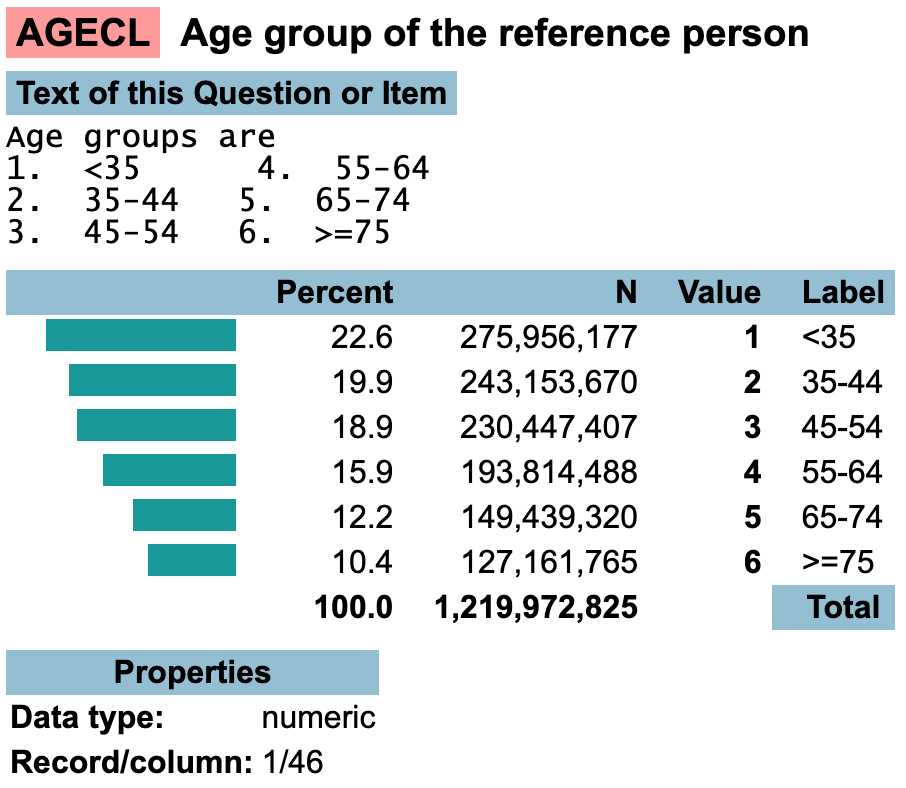

In [7]:
age_groups = df_fear['AGECL'].unique()
print("Age Groups:", age_groups)

Age Groups: [3 5 1 2 4 6]


**Task 6.1.3:** Create a list `age_groups` with the unique values in the `"AGECL"` column. Then review the entry for `"AGECL"` in the [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbkfx0.htm) to determine what the values represent.

In [11]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear['AGECL'].replace(agecl_dict)
age_cl.head()

5    45-54
6    45-54
7    45-54
8    45-54
9    45-54
Name: AGECL, dtype: object

**Task 6.1.5:** Create a bar chart showing the value counts from `age_cl`. Be sure to label the x-axis `"Age Group"`, the y-axis `"Frequency (count)"`, and use the title `"Credit Fearful: Age Groups"`.

- [Create a bar chart using pandas.](../%40textbook/07-visualization-pandas.ipynb#Bar-Charts)

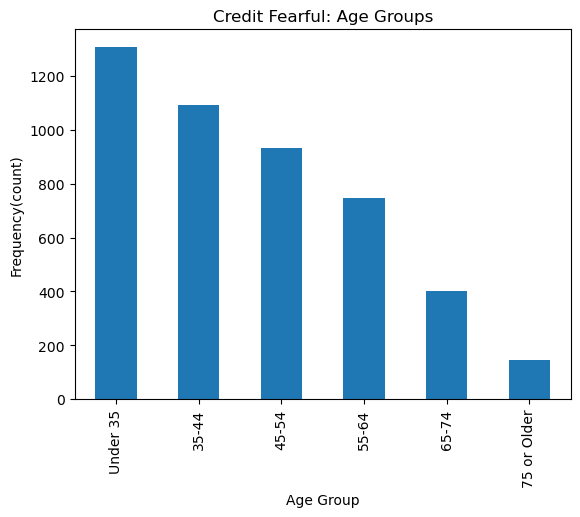

In [14]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(
    kind = 'bar',
    xlabel = 'Age Group',
    ylabel = 'Frequency(count)',
    title = 'Credit Fearful: Age Groups'
);

You might have noticed that by creating their own age groups, the authors of the survey have basically made a histogram for us comprised of 6 bins. Our chart is telling us that many of the people who fear being denied credit are younger. But the first two age groups cover a wider range than the other four. So it might be useful to look inside those values to get a more granular understanding of the data.

To do that, we'll need to look at a different variable: "AGE". Whereas "AGECL" was a categorical variable, "AGE" is continuous, so we can use it to make a histogram of our own.

**Task 6.1.6:** Create a histogram of the "AGE" column with 10 bins. Be sure to label the x-axis "Age", the y-axis "Frequency (count)", and use the title "Credit Fearful: Age Distribution".

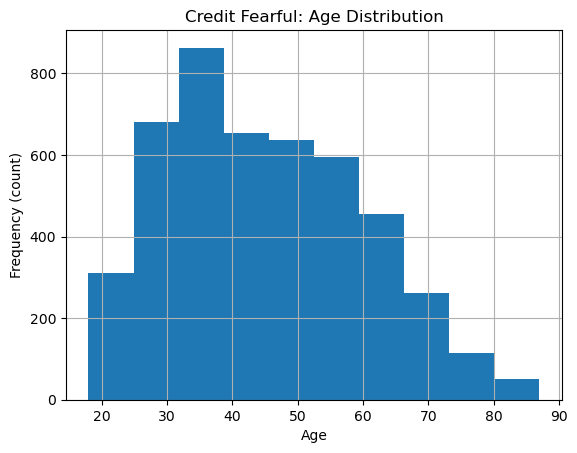

In [17]:
# Plot histogram of "AGE"
df_fear['AGE'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency (count)')
plt.title("Credit Fearful: Age Distribution");

### Race
Now that we have an understanding of how age relates to our outcome of interest, let's try some other possibilities, starting with race. If we look at the Code Book for "RACE", we can see that there are 4 categories.

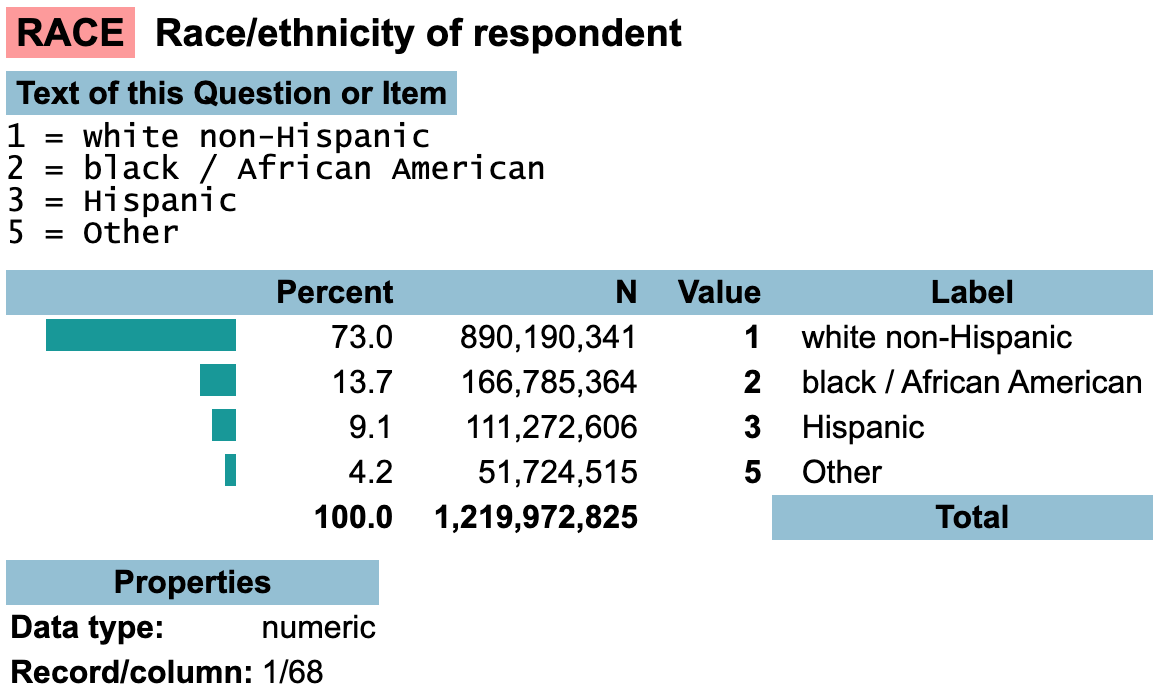

Note that there's no 4 category here. If a value for 4 did exist, it would be reasonable to assign it to "Asian American / Pacific Islander" — a group that doesn't seem to be represented in the dataset. This is a strange omission, but you'll often find that large public datasets have these sorts of issues. The important thing is to always read the data dictionary carefully. In this case, remember that this dataset doesn't provide a complete picture of race in America — something that you'd have to explain to anyone interested in your analysis.

**Task 6.1.7:** Create a horizontal bar chart showing the normalized value counts for `"RACE"`. In your chart, you should replace the numerical values with the true group names. Be sure to label the x-axis `"Frequency (%)"`, the y-axis `"Race"`, and use the title `"Credit Fearful: Racial Groups"`. Finally, set the `xlim` for this plot to `(0,1)`.

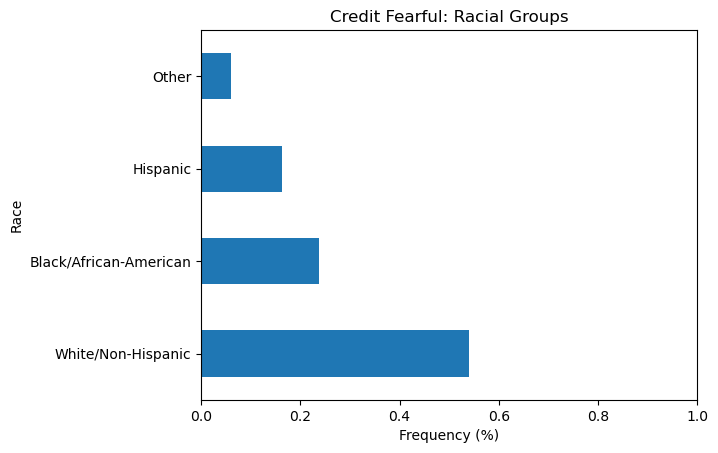

In [18]:
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_fear['RACE'].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind='barh')
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

This suggests that White/Non-Hispanic people worry more about being denied credit, but thinking critically about what we're seeing, that might be because there are more White/Non-Hispanic in the population of the United States than there are other racial groups, and the sample for this survey was specifically drawn to be representative of the population as a whole.

**Task 6.1.8:** Recreate the horizontal bar chart you just made, but this time use the entire dataset `df` instead of the subset `df_fear`. The title of this plot should be `"SCF Respondents: Racial Groups"`

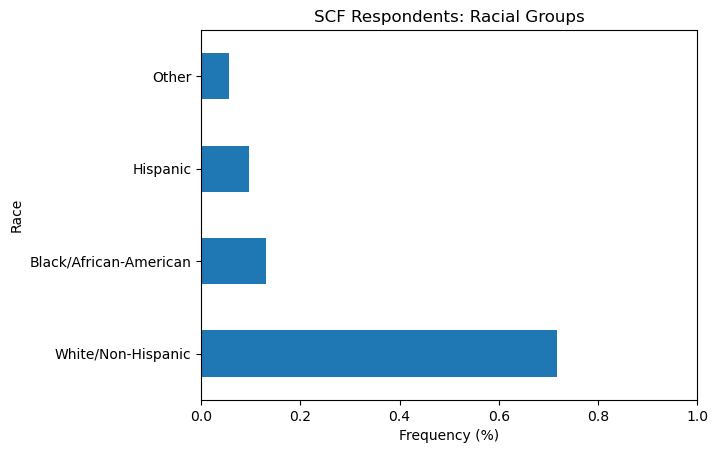

In [19]:
race = df['RACE'].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind='barh')
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

### Income
What about income level? Are people with lower incomes concerned about being denied credit, or is that something people with more money worry about? In order to answer that question, we'll need to again compare the entire dataset with our subgroup using the `"INCCAT"` feature, which captures income percentile groups. This time, though, we'll make a single, side-by-side bar chart.

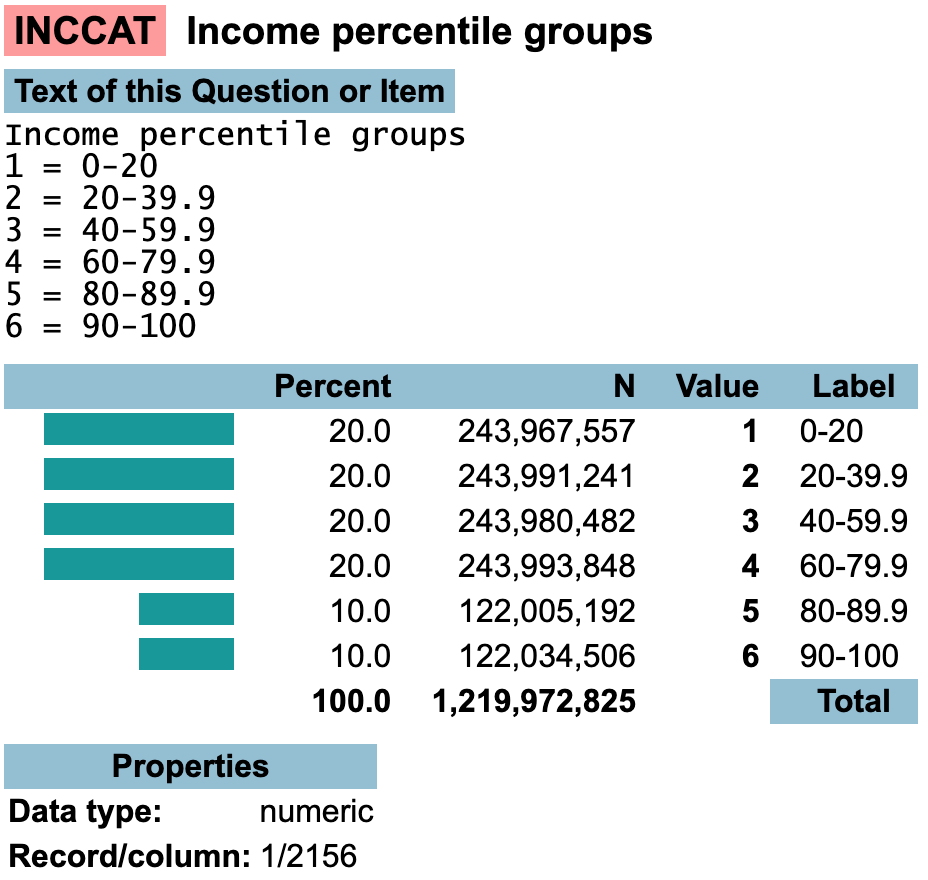

**Task 6.1.9:** Create a DataFrame `df_inccat` that shows the normalized frequency for income categories for both the credit fearful and non-credit fearful households in the dataset. Your final DataFrame should look something like this:

```
    TURNFEAR   INCCAT  frequency
0          0   90-100   0.297296
1          0  60-79.9   0.174841
2          0  40-59.9   0.143146
3          0     0-20   0.140343
4          0  21-39.9   0.135933
5          0  80-89.9   0.108441
6          1     0-20   0.288125
7          1  21-39.9   0.256327
8          1  40-59.9   0.228856
9          1  60-79.9   0.132598
10         1   90-100   0.048886
11         1  80-89.9   0.045209
```

In [20]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df['INCCAT']
    .replace(inccat_dict)
    .groupby(df['TURNFEAR'])
    .value_counts(normalize=True)
    .rename('frequency')
    .to_frame()
    .reset_index()


)
df_inccat

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


**Task 6.1.10:** Using seaborn, create a side-by-side bar chart of df_inccat. Set hue to "TURNFEAR", and make sure that the income categories are in the correct order along the x-axis. Label to the x-axis "Income Category", the y-axis "Frequency (%)", and use the title "Income Distribution: Credit Fearful vs. Non-fearful".

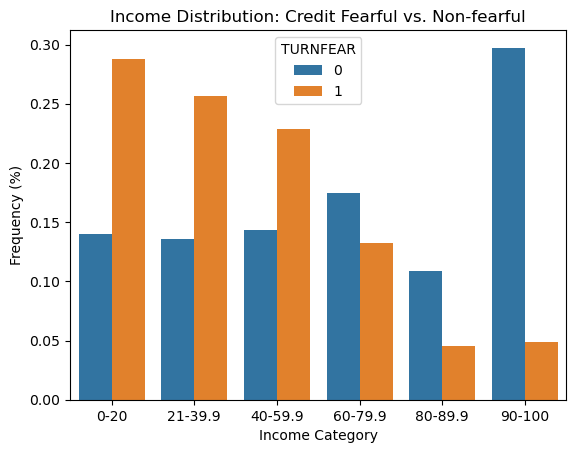

In [21]:
# Create bar chart of `df_inccat`
sns.barplot(
    x='INCCAT',
    y= 'frequency',
    hue='TURNFEAR',
    data= df_inccat,
    order=inccat_dict.values()
)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

Comparing the income categories across the fearful and non-fearful groups, we can see that credit fearful households are much more common in the lower income categories. In other words, the credit fearful have lower incomes.

So, based on all this, what do we know? Among the people who responded that they were indeed worried about being approved for credit after having been denied in the past five years, a plurality of the young and low-income had the highest number of respondents. That makes sense, right? Young people tend to make less money and rely more heavily on credit to get their lives off the ground, so having been denied credit makes them more anxious about the future.

### Assets
Not all the data is demographic, though. If you were working for a bank, you would probably care less about how old the people are, and more about their ability to carry more debt. If we were going to build a model for that, we'd want to establish some relationships among the variables, and making some correlation matrices is a good place to start.

First, let's zoom out a little bit. We've been looking at only the people who answered "yes" when the survey asked about "TURNFEAR", but what if we looked at everyone instead? To begin with, let's bring in a clear dataset and run a single correlation.

**Task 6.1.11:** Calculate the correlation coefficient for `"ASSET"` and `"HOUSES"` in the whole dataset `df`.

In [23]:
asset_house_corr = df['ASSET'].corr(df['HOUSES'])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544793152


That's a moderate positive correlation, which we would probably expect, right? For many Americans, the value of their primary residence makes up most of the value of their total assets. What about the people in our TURNFEAR subset, though? Let's run that correlation to see if there's a difference.

Aha! They're different! It's still only a moderate positive correlation, but the relationship between the total value of assets and the value of the primary residence is stronger for our TURNFEAR group than it is for the population as a whole.

Let's make correlation matrices using the rest of the data for both df and df_fear and see if the differences persist. Here, we'll look at only 5 features: "ASSET", "HOUSES", "INCOME", "DEBT", and "EDUC".

**Task 6.1.13:** Make a correlation matrix using df, considering only the columns "ASSET", "HOUSES", "INCOME", "DEBT", and "EDUC".

In [24]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519827,0.622429,0.261250,0.116673
HOUSES,0.519827,1.000000,0.247852,0.266661,0.169300
INCOME,0.622429,0.247852,1.000000,0.114646,0.069400
DEBT,0.261250,0.266661,0.114646,1.000000,0.054179
EDUC,0.116673,0.169300,0.069400,0.054179,1.000000


Make a correlation matrix using df_fear.

In [25]:
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


There are some pretty important differences here! The relationship between "DEBT" and "HOUSES" is positive for both datasets, but while the coefficient for df is fairly weak at 0.26, the same number for df_fear is 0.96.

Remember, the closer a correlation coefficient is to 1.0, the more exactly they correspond. In this case, that means the value of the primary residence and the total debt held by the household is getting pretty close to being the same. This suggests that the main source of debt being carried by our "TURNFEAR" folks is their primary residence, which, again, is an intuitive finding.

"DEBT" and "ASSET" share a similarly striking difference, as do "EDUC" and "DEBT" which, while not as extreme a contrast as the other, is still big enough to catch the interest of our hypothetical banker.

Let's make some visualizations to show these relationships graphically.

### Education
First, let's start with education levels "EDUC", comparing credit fearful and non-credit fearful groups.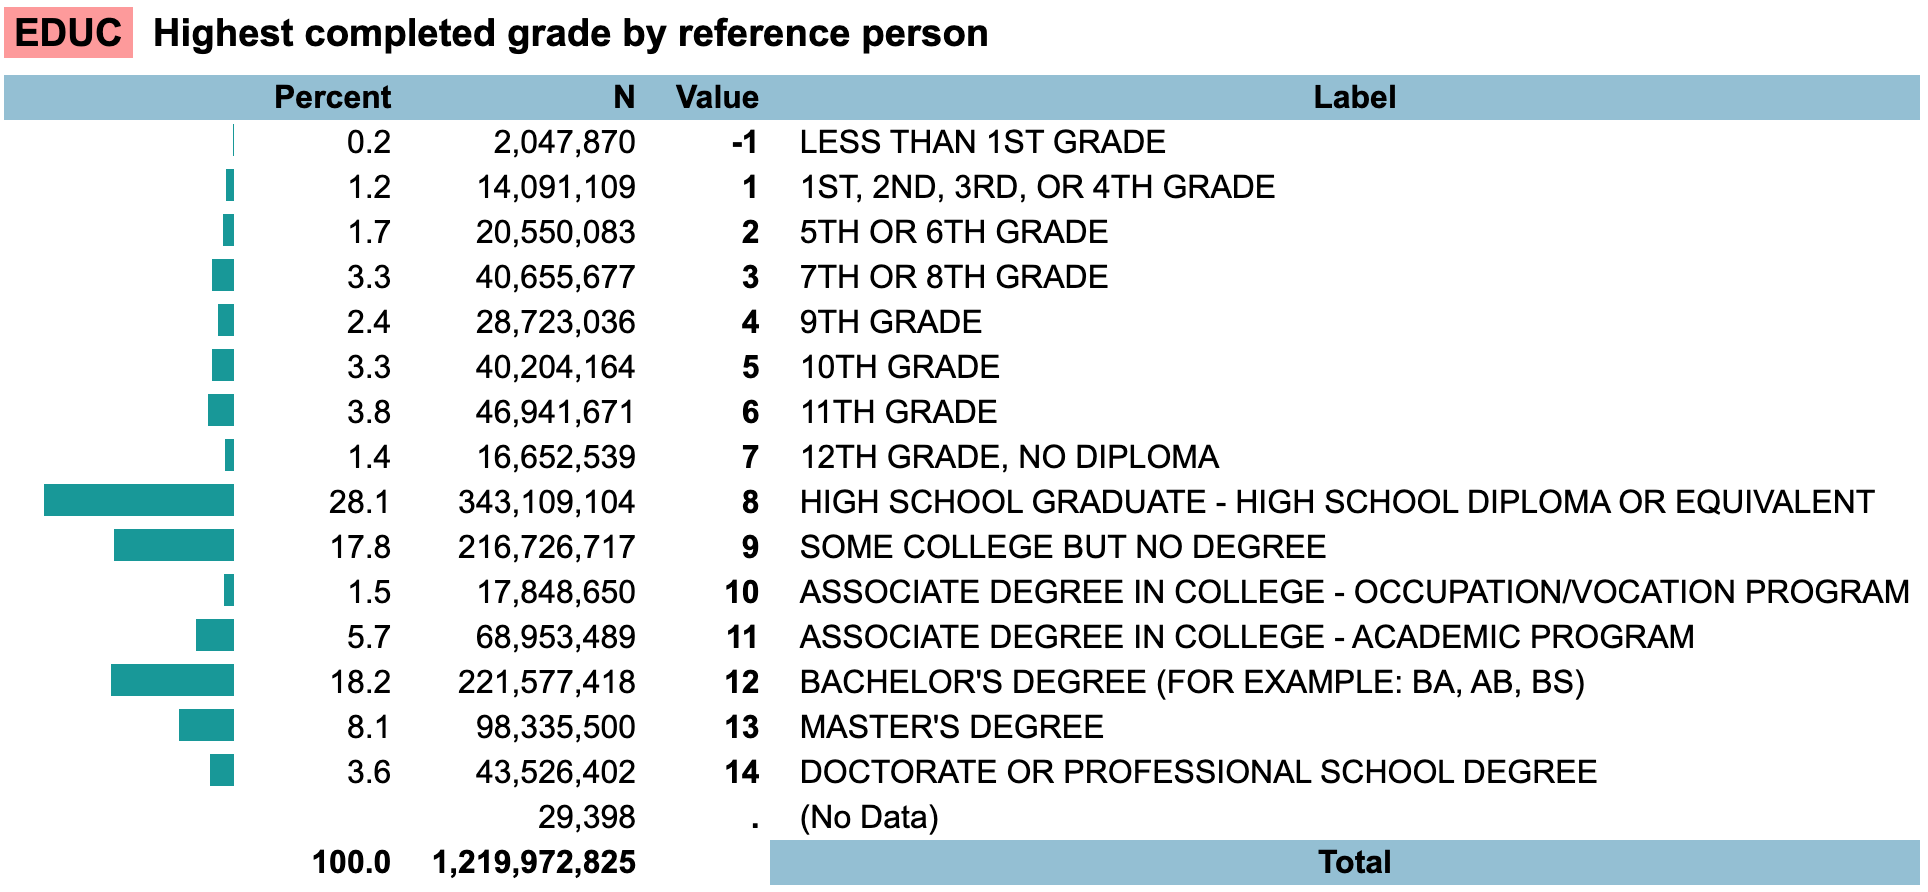

**Task 6.1.15:** Create a DataFrame `df_educ` that shows the normalized frequency for education categories for both the credit fearful and non-credit fearful households in the dataset. This will be similar in format to `df_inccat`, but focus on education. **Note** that you don't need to replace the numerical values in `"EDUC"` with the true labels.

```
    TURNFEAR  EDUC  frequency
0          0    12   0.257481
1          0     8   0.192029
2          0    13   0.149823
3          0     9   0.129833
4          0    14   0.096117
5          0    10   0.051150
...
25         1     5   0.015358
26         1     2   0.012979
27         1     3   0.011897
28         1     1   0.005408
29         1    -1   0.003245
```

In [26]:
df_educ = (
    df['EDUC']
    .groupby(df['TURNFEAR'])
    .value_counts(normalize=True)
    .rename('frequency')
    .to_frame()
    .reset_index()

)
df_educ.head()

,TURNFEAR,EDUC,frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117


**Task 6.1.16:** Using seaborn, create a side-by-side bar chart of `df_educ`. Set `hue` to `"TURNFEAR"`, and make sure that the education categories are in the correct order along the x-axis. Label to the x-axis `"Education Level"`, the y-axis `"Frequency (%)"`, and use the title `"Educational Attainment: Credit Fearful vs. Non-fearful"`.

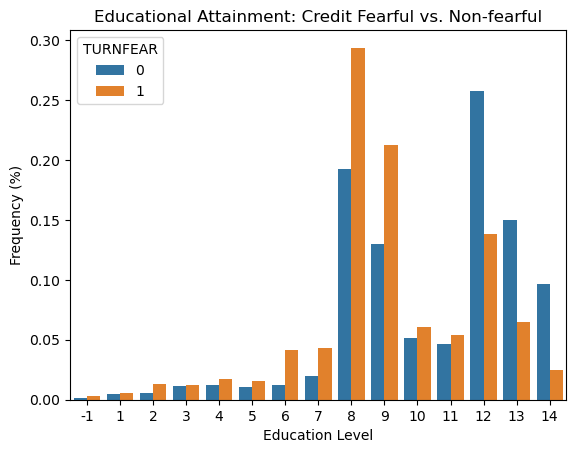

In [27]:
# Create bar chart of `df_educ`
sns.barplot(
    x= 'EDUC',
    y='frequency',
    hue='TURNFEAR',
    data= df_educ
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

### Debt
Let's keep going with some scatter plots that look at debt.

**Task 6.1.17:** Use `df` to make a scatter plot showing the relationship between `DEBT` and `ASSET`.

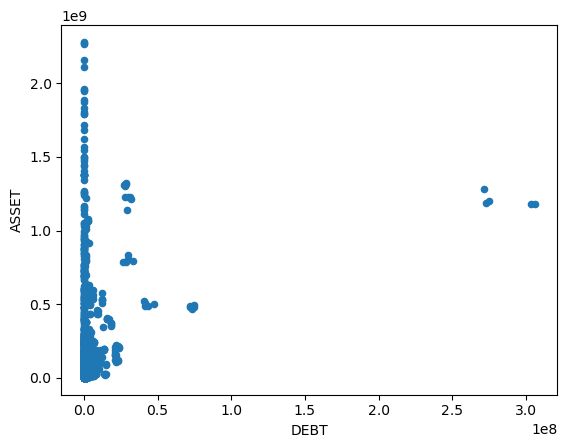

In [29]:
# Create scatter plot of ASSET vs DEBT, df
df.plot.scatter(x='DEBT', y='ASSET');

Use df_fear to make a scatter plot showing the relationship between DEBT and ASSET.

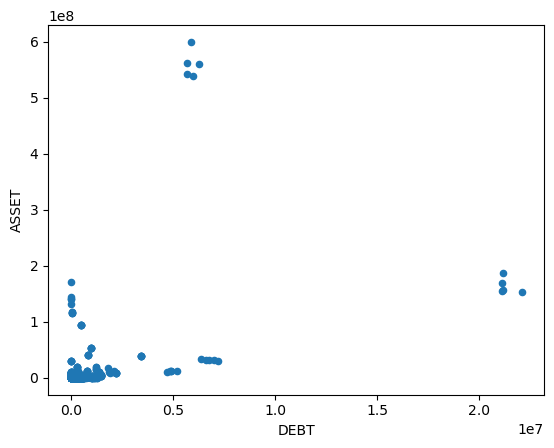

In [31]:
# Create scatter plot of ASSET vs DEBT, df_fear
df_fear.plot.scatter(x='DEBT', y='ASSET');

You can see relationship in our df_fear graph is flatter than the one in our df graph, but they clearly are different.

Let's end with the most striking difference from our matrices, and make some scatter plots showing the difference between HOUSES and DEBT.

**Task 6.1.19:** Use `df` to make a scatter plot showing the relationship between `HOUSES` and `DEBT`.

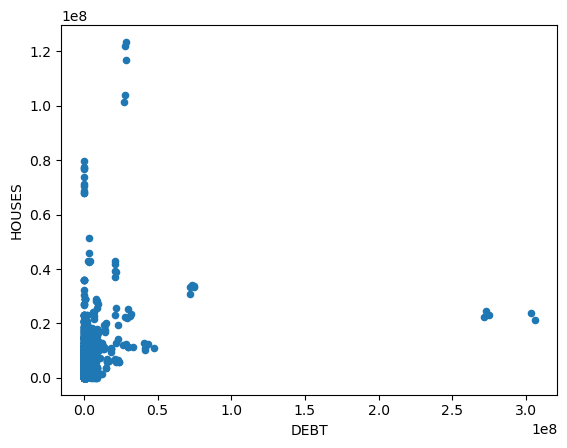

In [32]:
# Create scatter plot of HOUSES vs DEBT, df
df.plot.scatter(x='DEBT', y='HOUSES');

And make the same scatter plot using df_fear.

**Task 6.1.20:** Use `df_fear` to make a scatter plot showing the relationship between `HOUSES` and `DEBT`.

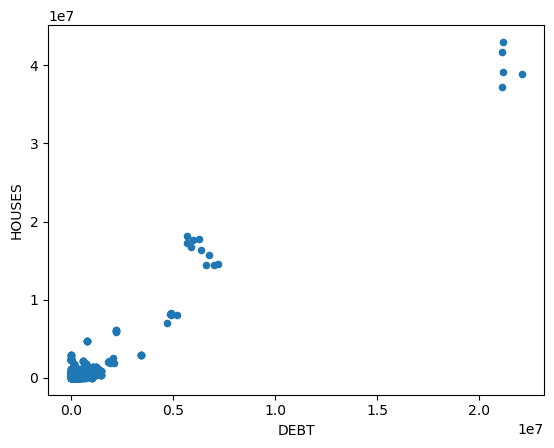

In [33]:
# Create scatter plot of HOUSES vs DEBT, df_fear
df_fear.plot.scatter(x='DEBT', y='HOUSES');

The outliers make it a little difficult to see the difference between these two plots, but the relationship is clear enough: our df_fear graph shows an almost perfect linear relationship, while our df graph shows something a little more muddled. You might also notice that the datapoints on the df_fear graph form several little groups. Those are called "clusters," and we'll be talking more about how to analyze clustered data in the next lesson.